In [10]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [11]:
import plotly.graph_objs as go

# Create data
x = [1, 2, 3, 4, 5]
y = [2, 1, 3, 2, 4]
labels = ['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5']

# Create trace
trace = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(152, 0, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    ),
    text=labels,
    hoverinfo='text'
)

# Create layout
layout = go.Layout(
    title='Interactive Scatterplot',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show figure
fig.show()


In [12]:
import plotly.graph_objs as go
import webbrowser

# Create data
x = [1, 2, 3, 4, 5]
y = [2, 1, 3, 2, 4]
labels = ['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5']
files = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt']

# Create trace
trace = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(152, 0, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    ),
    text=labels,
    hoverinfo='text',
    customdata=files
)

# Create layout
layout = go.Layout(
    title='Interactive Scatterplot',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Define callback function for clicking on points
def on_click(trace, points, state):
    if points.point_inds:
        file = trace.customdata[points.point_inds[0]]
        print(f"Opening file {file}...")
        webbrowser.open_new_tab(file)


# Add callback function to figure
fig.data[0].on_click(on_click)

# Show figure
fig.show()


In [13]:
import matplotlib.pyplot as plt
import webbrowser
import pandas as pd

# Define x and y coordinates and file paths for each point
data = pd.read_csv('tsne.csv')
data


,# 1,2
0,15.861119,70.590683
1,15.116755,67.730659
2,19.696543,67.013847
3,16.441387,70.967064
4,20.219522,66.747627
...,...,...
6599,-57.015629,-22.134409
6600,-55.882233,-21.020842
6601,-55.254406,-21.779972
6602,-54.726532,-22.914322


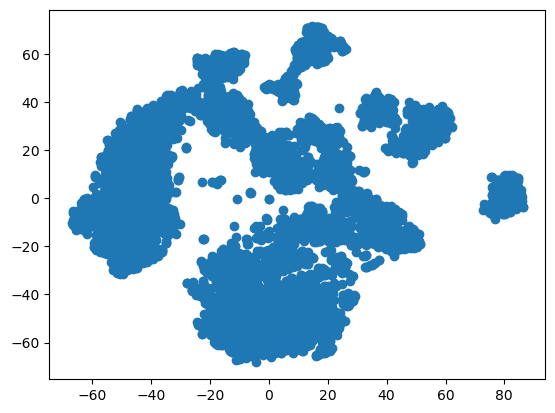

In [16]:
x=data[data.columns[0]]
y=data[data.columns[1]]
files = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt']

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, picker=True)

# Define a function to open a file on click
def on_click(event):
    if event.inaxes == ax:
        index = event.ind[0]
        file_path = files[index]
        webbrowser.open(file_path)

# Connect the on_click function to the scatter plot
fig.canvas.mpl_connect('button_press_event', on_click)

# Display the plot
plt.show()


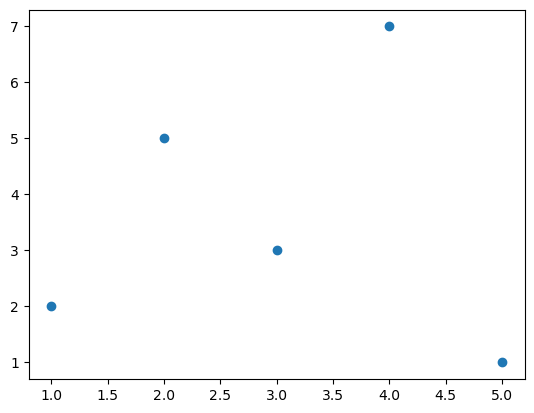

In [18]:
import matplotlib.pyplot as plt
import webbrowser

# Define x and y coordinates and file paths for each point
x = [1, 2, 3, 4, 5]
y = [2, 5, 3, 7, 1]
files = ['file1.txt', 'file2.txt', 'file3.txt', 'file4.txt', 'file5.txt']

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, picker=True)

# Define a function to open a file on click
def on_pick(event):
    ind = event.ind
    if len(ind) > 0:
        index = ind[0]
        file_path = files[index]
        webbrowser.open(file_path)

# Connect the on_pick function to the scatter plot
fig.canvas.mpl_connect('pick_event', on_pick)

# Display the plot
plt.show()


In [20]:
import numpy as np 
import plotly.express as px
import pandas as pd

In [28]:
# Define x and y coordinates and file paths for each point
data = pd.read_csv('tsne.csv')
data

,# 1,2,class
0,15.9,70.6,anthrophony
1,15.1,67.7,anthrophony
2,19.7,67.0,anthrophony
3,16.4,71.0,anthrophony
4,20.2,66.7,anthrophony
...,...,...,...
6599,-57.0,-22.1,other
6600,-55.9,-21.0,other
6601,-55.3,-21.8,other
6602,-54.7,-22.9,other


In [37]:
x=data[data.columns[0]]
y=data[data.columns[1]]
fig = px.scatter(data, x="# 1", y='2', color='class', hover_name=x.index)
fig.show()

In [2]:
%pip install pygame

     ---------------------------------------- 10.6/10.6 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


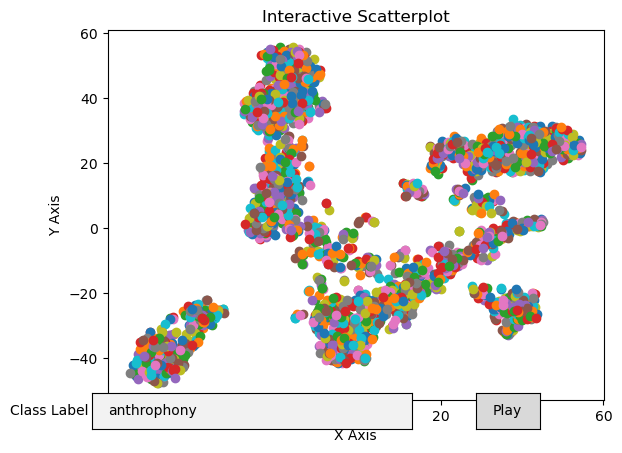

In [5]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, TextBox
import pandas as pd
import pygame

# Load data from a CSV file
data = pd.read_csv('tsne-wambiana.csv')

# Initialize Pygame mixer for playing audio
pygame.mixer.init()

# Define a function to play the sound clip for a given point
def play_sound(sound_file):
    pygame.mixer.music.load(sound_file)
    pygame.mixer.music.play()

# Define a function to update the class label for a given point
def update_label(text, index):
    data.iloc[index]['class_label'] = text

# Define a function to handle button clicks
def button_click(event):
    if event.inaxes is not None:
        index = int(event.xdata)
        play_sound(data.iloc[index]['sound_file'])
        textbox.set_val(data.iloc[index]['class_label'])
        textbox.index = index

# Define a function to handle text box changes
def textbox_submit(text):
    index = textbox.index
    update_label(text, index)
    data.to_excel('data_updated.xlsx', index=False)

# Create a scatterplot with class labels and sound clip locations
fig, ax = plt.subplots()
ax.set_title('Interactive Scatterplot')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

for index, row in data.iterrows():
    ax.scatter(row['x'], row['y'], label=row['class'])
    
# Add buttons and text box
button_ax = plt.axes([0.7, 0.05, 0.1, 0.075])
play_button = Button(button_ax, 'Play')

textbox_ax = plt.axes([0.1, 0.05, 0.5, 0.075])
textbox = TextBox(textbox_ax, 'Class Label', initial=data.iloc[0]['class'])
textbox.on_submit(textbox_submit)

# Add button click event handler
play_button.on_clicked(button_click)

plt.show()
